In [1]:
library(extrafont)
loadfonts()

library(ggplot2)
library(gss)

Registering fonts with R


# Pan, pad, pass, pat

![](http://content6.flixster.com/photo/11/38/44/11384492_gal.jpg)

In [3]:
#load articulation data files for two speakers
a.tongue <- read.csv("data/NJ0205a_Tongue_Contour.csv")
c.tongue <- read.csv("data/NJ0205c_Tongue_Contour.csv")

summary(a.tongue)

Warning message in file(file, "rt"):
“cannot open file 'data/NJ0205a_Tongue_Contour.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [4]:
#relevel words so that pan is first
a.tongue$word <- relevel(a.tongue$word, "pan")
c.tongue$word <- relevel(c.tongue$word, "pan")

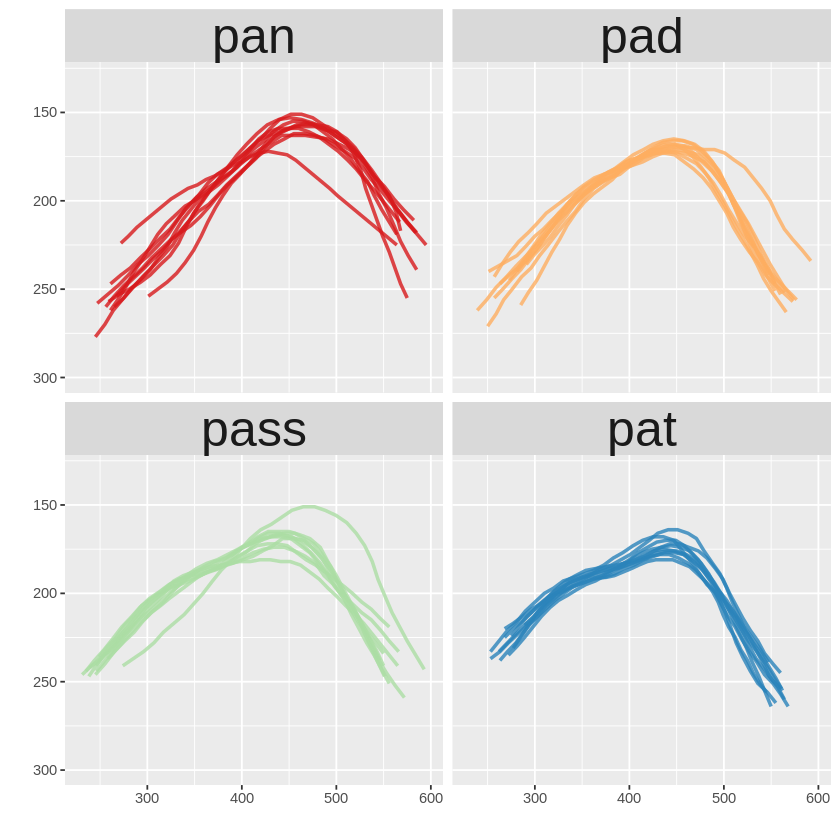

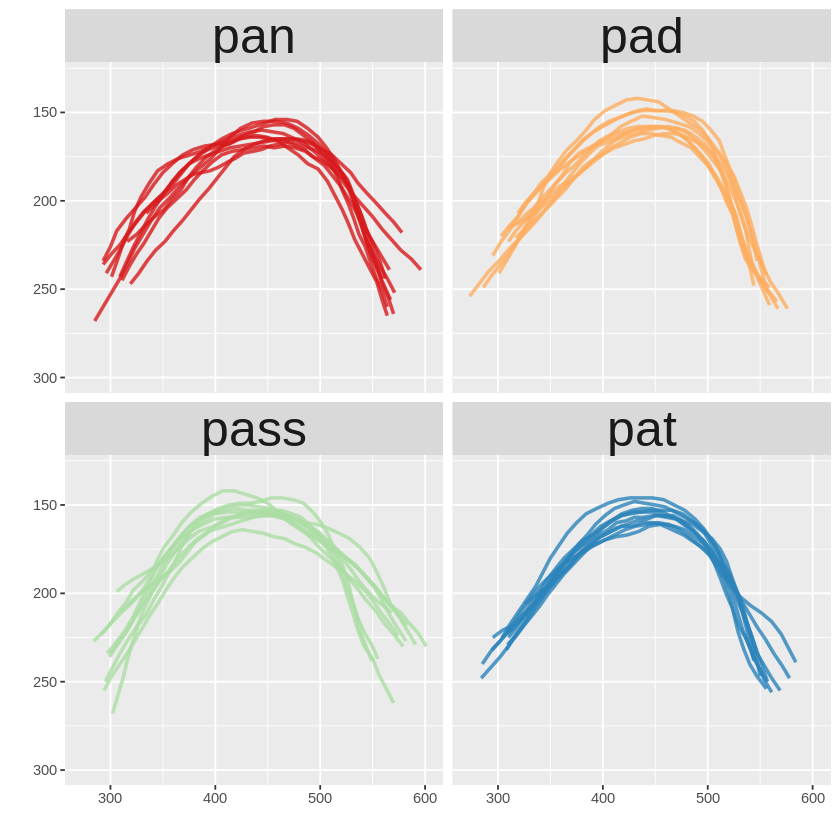

In [5]:
# First let's create plots of all the contours for each speaker

A.tokens <- ggplot(a.tongue, aes(x=X, y=Y, group = token, colour=word))
A.tokens + geom_line(aes(y=Y), alpha = 0.8, size=1) + scale_y_reverse(limits = c(300,130)) + ylab("") + xlab("") + scale_color_brewer(type = "qual", palette = "Spectral") +facet_wrap(~ word)  + theme(legend.position="none") + theme(strip.text.x=element_text(size=30))

C.tokens <- ggplot(c.tongue, aes(x=X, y=Y, group = token, colour=word))
C.tokens + geom_line(aes(y=Y), alpha = 0.8, size=1) + scale_y_reverse(limits = c(300,130))  + ylab("") + xlab("")+ theme(strip.text.x=element_text(size=30))+ theme(legend.position="none") + scale_color_brewer(type = "qual", palette = "Spectral") +facet_wrap(~ word)

In [6]:
# We can eyeball variation between the bundles of tongues, but there is variation within each word. What we'd like to do is get some sense of what the 'average' tongue shape is for each word, and then compare these

# We can model those average tongue shapes using ssanova()

# fit ANOVA models using the ssanova function from the gss package
# shorthand for word+X+word:X is simply word*X
tongue.model.A <- ssanova(Y ~ word + X + word:X,data=a.tongue)
tongue.model.C <- ssanova(Y ~ word + X + word:X, data=c.tongue)

summary(tongue.model.A)


Call:
ssanova(formula = Y ~ word + X + word:X, data = a.tongue)

Estimate of error standard deviation: 8,018998 

Residuals:
       Min         1Q     Median         3Q        Max 
-41,988367  -3,629158  -0,109984   3,624847  37,655875 
Residual sum of squares: 83090,72
R square: 0,9065018

Penalty associated with the fit: 1640,118


In [7]:
# Sort of unclear how to extract some number from this that tells 
# us whether the words are significantly different from one another, but we can explore this graphically

#First, generate predicted values from the model: 
# To do this, create a new dataframe to predict fitted values against using the expand.grid()
# x values seeding each grid = range(x) for each speaker

grid.A <- expand.grid(X = seq(231, 595, length = 33), word = c("pan", "pad", "pass", "pat")) 
head(grid.A)

X,word
"231,000",pan
"242,375",pan
"253,750",pan
"265,125",pan
"276,500",pan
"287,875",pan


In [8]:
# then use predict() to generate predicted y values, append these to dataframe

grid.A$Fit <- predict(tongue.model.A, newdata = grid.A, se = T)$fit 
head(grid.A)

X,word,Fit
"231,000",pan,"273,3720"
"242,375",pan,"266,5701"
"253,750",pan,"259,9214"
"265,125",pan,"253,3840"
"276,500",pan,"247,0635"
"287,875",pan,"240,8507"


In [9]:
# then use predict to generate standard errors (standard deviation of the sampling distribution), 
# zappend these to dataframe 
grid.A$SE <- predict(tongue.model.A, newdata = grid.A, se = T)$se.fit 
head(grid.A)

X,word,Fit,SE
"231,000",pan,"273,3720","4,049049"
"242,375",pan,"266,5701","2,879543"
"253,750",pan,"259,9214","2,032473"
"265,125",pan,"253,3840","1,521443"
"276,500",pan,"247,0635","1,197821"
"287,875",pan,"240,8507","1,155278"


In [10]:
# do the same for speaker C

grid.C <- expand.grid(X = seq(273, 601, length = 33), word = c("pan", "pad", "pass", "pat")) 
grid.C$Fit <- predict(tongue.model.C, newdata = grid.C, se = T)$fit 
grid.C$SE <- predict(tongue.model.C, newdata = grid.C, se = T)$se.fit

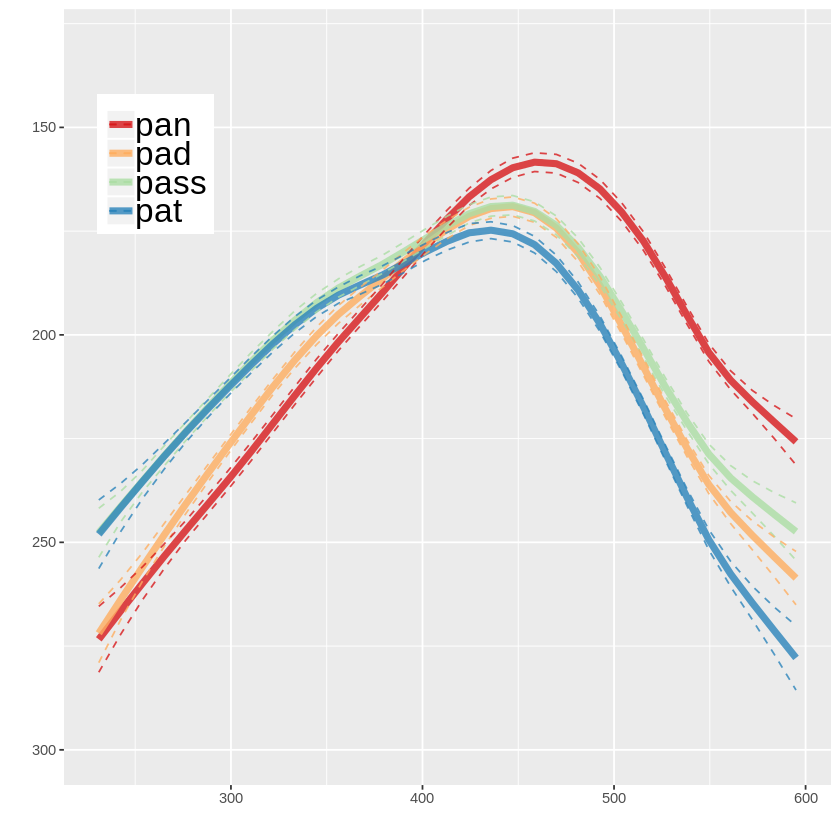

In [11]:
#Now we can create plots of average contours

comparison.A <- ggplot(grid.A, aes(x = X, colour = word))
comparison.A + geom_line(aes(y = Fit), size=2, alpha = .8) + scale_y_reverse(limits = c(300,130)) + scale_color_brewer(type = "qual", palette = "Spectral") + ylab("") + xlab("") + geom_line(aes(y = Fit+(1.96*SE)), lty=2, alpha=0.8) + geom_line(aes(y = Fit-(1.96*SE)), lty=2, alpha=0.8) +  theme(legend.position=c(0.12, 0.8)) + theme(legend.text=element_text(size=20)) + theme(legend.title=element_text(size=0))

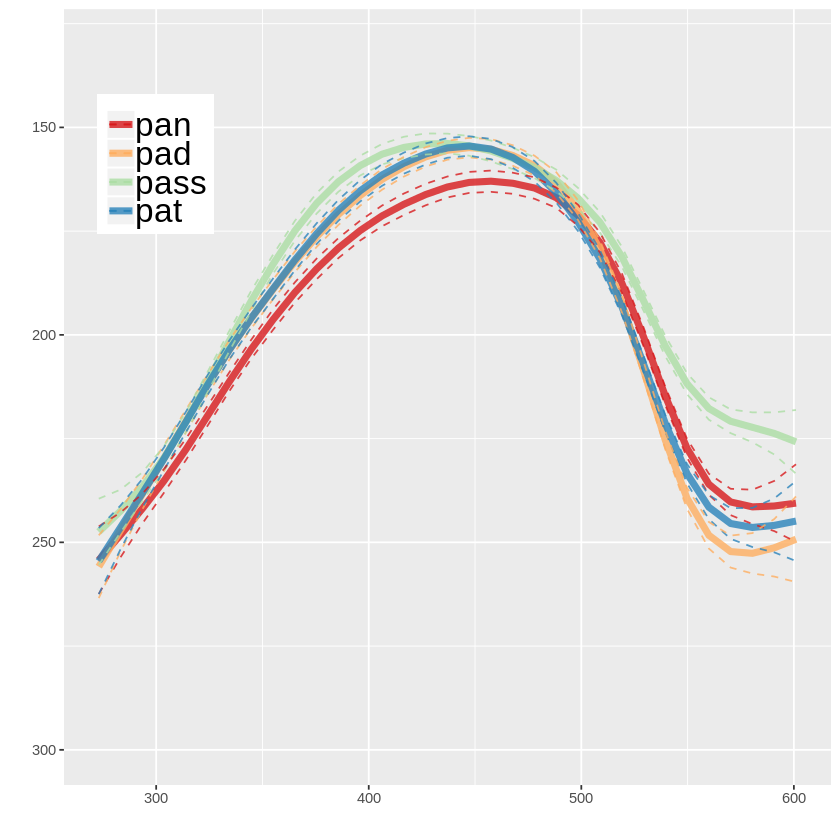

In [12]:
#For C

#Create plots of average contours

comparison.C <- ggplot(grid.C, aes(x = X, colour = word))
comparison.C + geom_line(aes(y = Fit), size=2, alpha = .8) + scale_y_reverse(limits = c(300,130)) + scale_color_brewer(type = "qual", palette = "Spectral") + ylab("") + xlab("") + geom_line(aes(y = Fit+(1.96*SE)), lty=2, alpha=0.8) + geom_line(aes(y = Fit-(1.96*SE)), lty=2, alpha=0.8) +  theme(legend.position=c(0.12, 0.8)) + theme(legend.text=element_text(size=20)) + theme(legend.title=element_text(size=0))

In [13]:
# We can visually inspect the contribution each term in the model makes to the shape of the spline

# First, let's create an average curve for all the tokens. 

# create prediction grid
grid.A <- expand.grid(X = seq(231,595,length = 33),word = c("pan","pad", "pass", "pat"))
## Predict for certain terms
## Use inc argument to predict for the intercept and X value only, not distinguishing word
 grid.A$Fit <- predict(tongue.model.A,grid.A,se = T,inc = c("1","X"))$fit
 grid.A$SE <- predict(tongue.model.A,grid.A,se = T,inc = c("1","X"))$se.fit

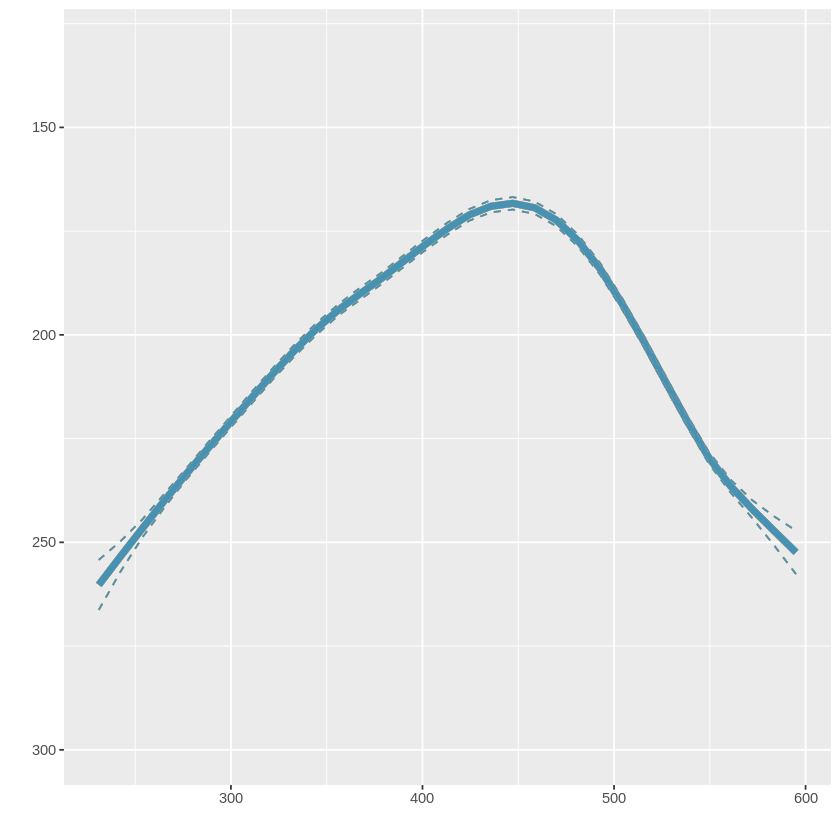

In [14]:
# then plot that overall average curve(Setting intervals specifies computation of 
#confidence or prediction (tolerance) intervals at the specified level, 
# sometimes referred to as narrow vs. wide intervals.)

#my understanding is that if you have 1 and X in "inc" arg but not "word", 
# you're using only those two terms to predict in the model. which means you're 
# examining the contribution of each of the terms. 
average <- ggplot(grid.A, aes(x = X, colour = word))
average+ geom_line(aes(y = Fit), size=2, alpha = .8) + scale_y_reverse(limits = c(300,130)) + scale_color_brewer(type = "qual", palette = "Spectral") + ylab("") + xlab("") + geom_line(aes(y = Fit+(1.96*SE)), lty=2, alpha=0.8) + geom_line(aes(y = Fit-(1.96*SE)), lty=2, alpha=0.8) +  theme(legend.position="none") 


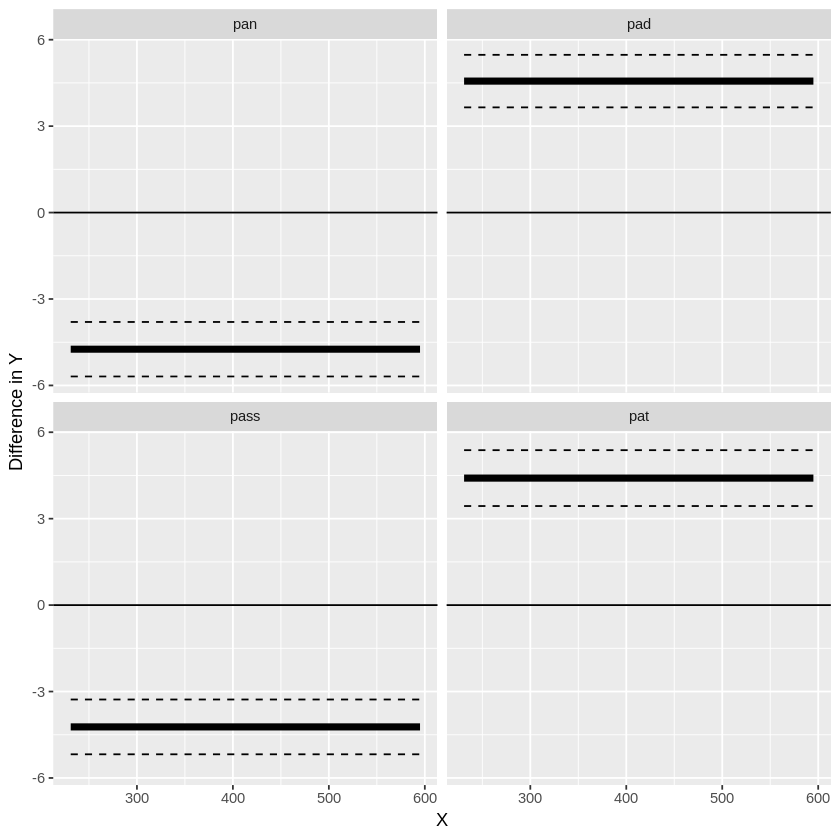

In [15]:
# Now the question is, does being a specific word class result in a curve that is very different from this?
grid <- expand.grid(X = seq(231,595,length = 33), word = c("pan", "pad", "pass", "pat"))
grid$Fit <- predict(tongue.model.A,grid,se = T, inc = "word")$fit
grid$SE <- predict(tongue.model.A,grid,se = T, inc = "word")$se.fit
wordplot <- ggplot(grid, aes(x = X))
wordplot + geom_line(aes(y = Fit), lwd = 2)+ geom_line(aes(y = Fit+(1.96*SE)),lty = 2) + geom_line(aes(y = Fit-(1.96*SE)),lty = 2)+ facet_wrap(~word)+ geom_abline(slope = 0,intercept = 0) + ylab("Difference in Y")
#this is basically to single out the effect of "word". 
# what is the different in y value if you only use word to predict it, excluding terms X and intercept?
# Confidence intervals around each word effect do not cross zero, so there is a significant effect of word

In [16]:
# We are not just interested in whether words are different from each other,
# but *where* along the trajectory those differences are
# So let's look at X:word
# predict group and interaction effects
grid <- expand.grid(X = seq(231,595, length = 33), word = c("pan","pad", "pass", "pat"))
grid$Fit <- predict(tongue.model.A, grid, se = T, inc = c( "word", "word:X"))$fit
grid$SE <- predict(tongue.model.A, grid, se = T, inc = c( "word", "word:X"))$se.fit

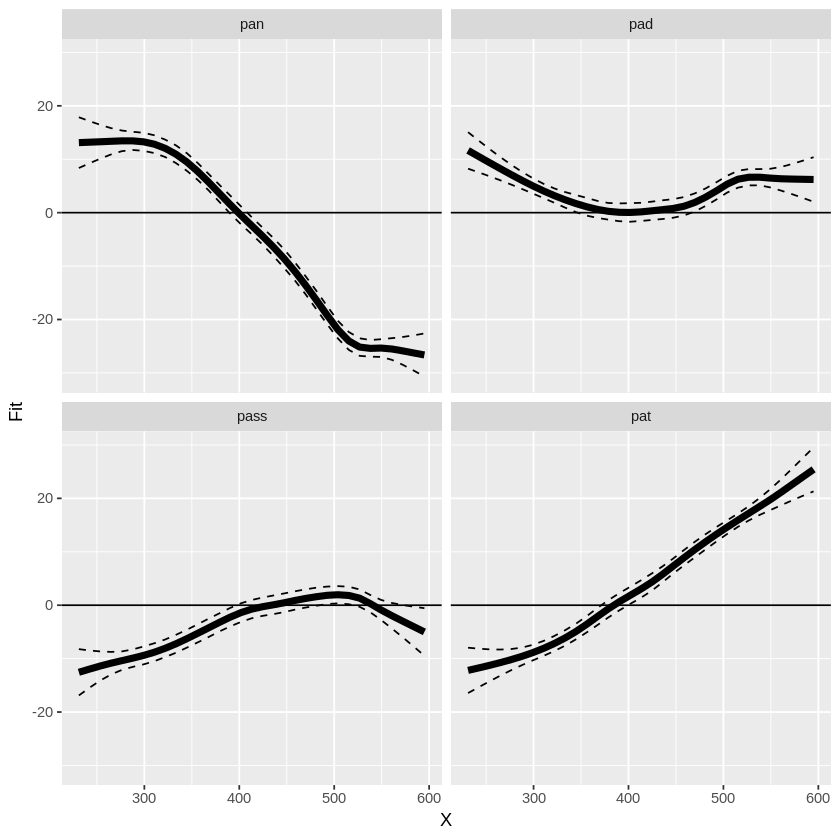

In [18]:
interaction <- ggplot(grid, aes(x = X))
interaction + geom_line(aes(y = Fit),lwd = 2)+ geom_line(aes(y = Fit+(1.96*SE)),lty = 2) + geom_line(aes(y = Fit-(1.96*SE)),lty = 2) + facet_wrap(~word) + geom_abline(slope = 0,intercept = 0)
# So this is a little hard to interpret - we can see that pad and pass 
# are not really difference from the average curve in terms of the tongue body position, 
# but hard to pin down precise differences between pairs of words.

In [19]:
# So: let's look at some pairs separately 
#Create subframes from A
A.panpass <- a.tongue[a.tongue$word=="pan" | a.tongue$word=="pass",]
droplevels(A.panpass) -> A.panpass
A.patpass <- a.tongue[a.tongue$word=="pat" | a.tongue$word=="pass",]
droplevels(A.patpass) -> A.patpass

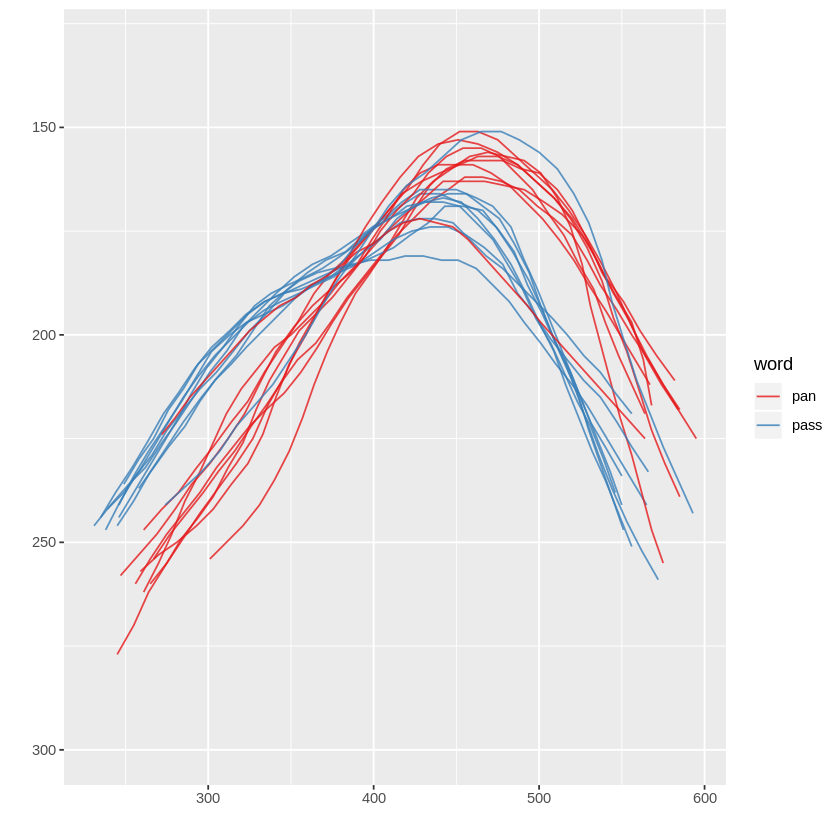

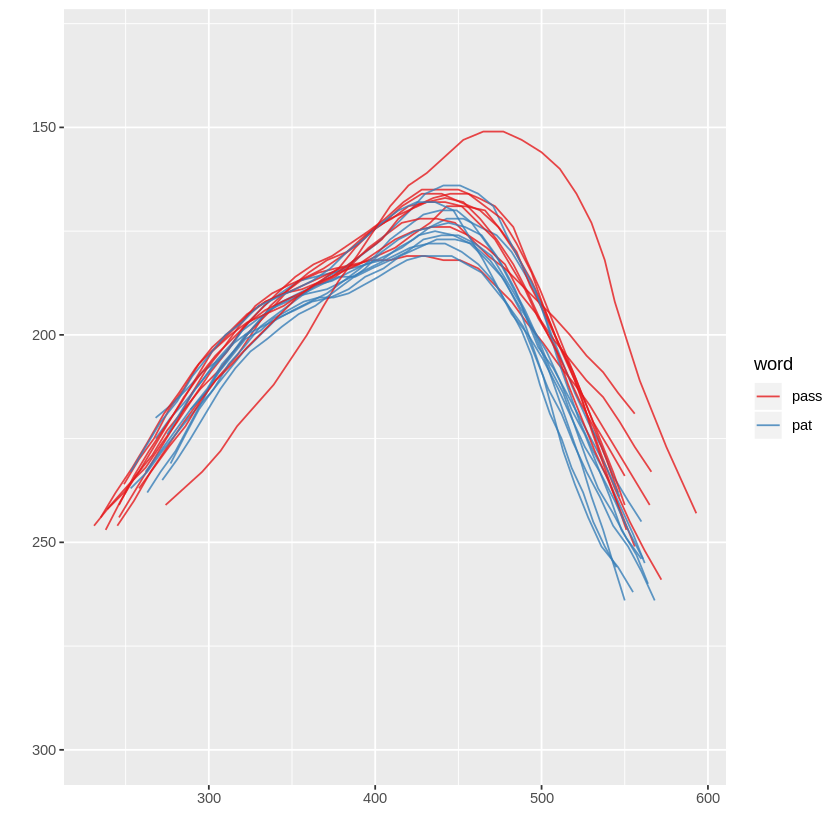

In [20]:
##Create pairs plots
  tonguesA.panpass <- ggplot(A.panpass, aes(x=X, y=Y, group = token, colour = word))
 tonguesA.panpass  + geom_line(aes(y=Y), alpha = 0.8)  + scale_y_reverse(limits = c(300,130))  + scale_colour_brewer(palette="Set1")  + ylab("") + xlab("")
  
  
  tonguesA.patpass <- ggplot(A.patpass, aes(x=X, y=Y, group = token, colour = word))
  tonguesA.patpass  + geom_line(aes(y=Y), alpha = 0.8)  + scale_y_reverse(limits = c(300,130))  + scale_colour_brewer(palette="Set1")  + ylab("") + xlab("")

In [21]:
#fit anova model for each pair
tongue.model.A.panpass <- ssanova(Y ~ word + X + word:X, data=A.panpass)
tongue.model.A.patpass <- ssanova(Y ~ word + X + word:X, data=A.patpass)

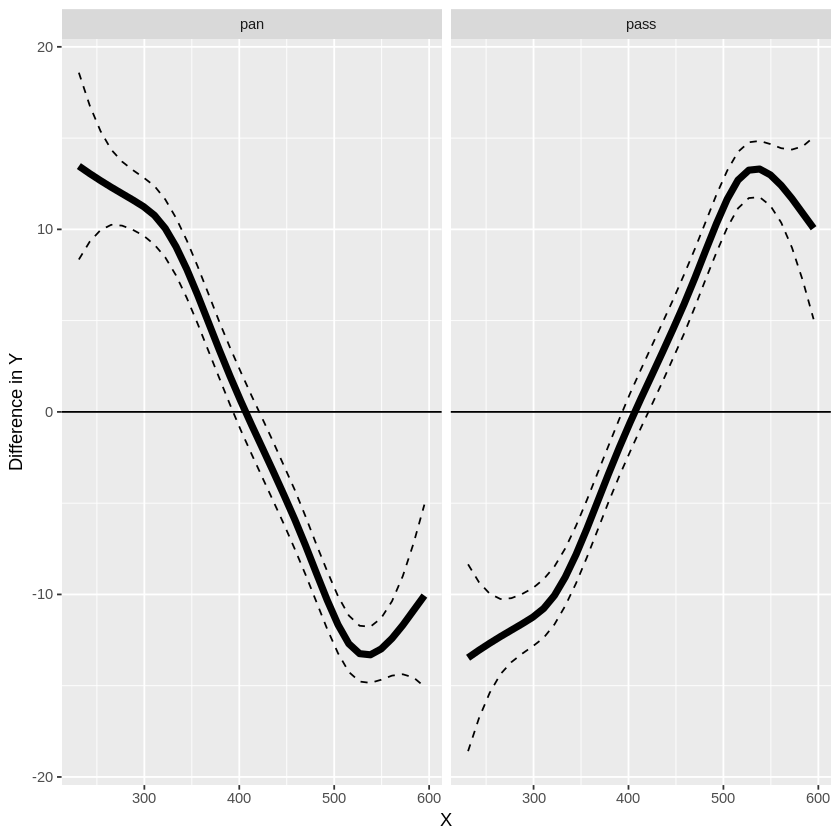

In [22]:
# we've seen the average curves already so will skip ahead to the examination of word:X interaction  
grid <- expand.grid(X = seq(231,595, length = 33), word = c("pan","pass"))
grid$Fit <- predict(tongue.model.A.panpass, grid, se = T, inc = c("word", "word:X"))$fit
grid$SE <- predict(tongue.model.A.panpass, grid, se = T, inc = c("word", "word:X"))$se.fit

  inter <- ggplot(grid, aes(x = X))
  inter + geom_line(aes(y = Fit),lwd = 2)+ geom_line(aes(y = Fit+(1.96*SE)),lty = 2) + geom_line(aes(y = Fit-(1.96*SE)),lty = 2) + facet_wrap(~word) + geom_abline(slope = 0,intercept = 0)+ ylab("Difference in Y")


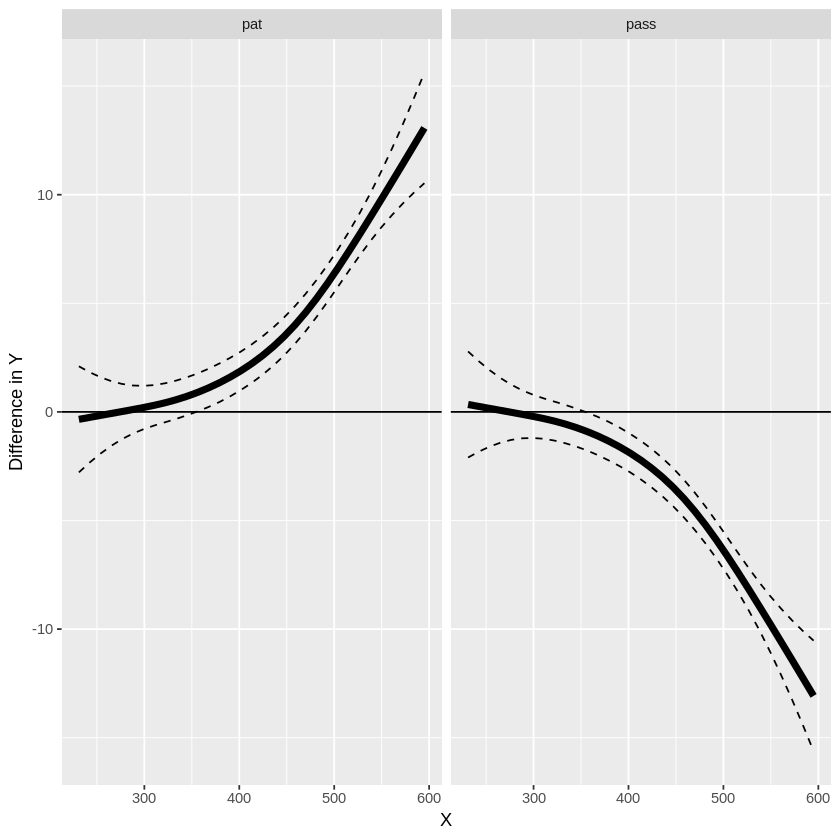

In [23]:
# pan and pass hella different everywhere
  
  grid <- expand.grid(X = seq(231,595, length = 33), word = c("pat","pass"))
  grid$Fit <- predict(tongue.model.A.patpass, grid, se = T, inc = c("word", "word:X"))$fit
  grid$SE <- predict(tongue.model.A.patpass, grid, se = T, inc = c("word", "word:X"))$se.fit
  
  inter <- ggplot(grid, aes(x = X))
  inter + geom_line(aes(y = Fit),lwd = 2)+ geom_line(aes(y = Fit+(1.96*SE)),lty = 2) + geom_line(aes(y = Fit-(1.96*SE)),lty = 2) + facet_wrap(~word) + geom_abline(slope = 0,intercept = 0) +ylab("Difference in Y")
  
  # pat and pass have similar tongue dorsum position, but very different elsewhere